## 6.6 Sourcing & Analyzing Time-Series Data

### Import libraries and data

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
# Create file path
path = r'C:\Users\mgril\OneDrive\Desktop\UFC project folder'

In [3]:
# import UFC data set
df_UFC = pd.read_csv(os.path.join(path,  'Prepared data UFC', 'UFC_wrangled_new.csv'), index_col = False)

In [4]:
df_UFC.head()

,Unnamed: 0,r_fighter,b_fighter,date_of_fight,year_of_fight,city,state,country,winner,r_winner,...,r_win_tko,r_win_tko_actual,r_win_sub,r_win_dr_stop,r_stance,r_height_cms,r_reach_cms,r_weight_lbs,b_age,r_age
0,97,Vitor Belfort,Tra Telligman,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,1,1,0,0,Southpaw,182.88,176.0,185,32,19
1,98,Mark Coleman,Dan Severn,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,3,0,2,0,Orthodox,185.42,193.0,205,38,32
2,99,Jerry Bohlander,Nick Sanzo,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,0,0,2,0,Orthodox,180.34,193.0,199,30,22
3,102,Jerry Bohlander,Rainy Martinez,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,0,0,1,0,Orthodox,180.34,176.0,199,30,22
4,103,Yoshiki Takahashi,Wallid Ismail,2/7/1997,1997,Dothan,Alabama,United States of America,Red,1,...,0,0,0,0,Southpaw,180.34,169.0,199,28,27


In [5]:
# Define data types for specific columns
data_types = {'date_of_fight': 'datetime64'}

In [6]:
file_path = os.path.join(path, 'Prepared data UFC','UFC_wrangled_new.csv')

In [7]:
parse_dates = ['date_of_fight']

In [8]:
df_UFC = pd.read_csv(file_path, parse_dates=parse_dates)

In [9]:
df_UFC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748 entries, 0 to 5747
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Unnamed: 0        5748 non-null   int64         
 1   r_fighter         5748 non-null   object        
 2   b_fighter         5748 non-null   object        
 3   date_of_fight     5748 non-null   datetime64[ns]
 4   year_of_fight     5748 non-null   int64         
 5   city              5748 non-null   object        
 6   state             5748 non-null   object        
 7   country           5748 non-null   object        
 8   winner            5748 non-null   object        
 9   r_winner          5748 non-null   int64         
 10  win_all           5748 non-null   int64         
 11  b_winner          5748 non-null   int64         
 12  weight_class      5748 non-null   object        
 13  b_wins            5748 non-null   int64         
 14  b_losses          5748 n

## 03. Make a subset of your data set if necessary. Think about the historical domain of the series to decide if you need to (if there are irrelevant historical events in your data that would bias your analysis, for example). Also, make sure your set doesn’t include any forecasted data.
In a markdown cell below the subset (if you make one), explain what logic you were following when selecting your data points.
Remember that if you subset your data, you’ll need to reset the index, subset, then reset the “Date” column as your index in the new dataframe.

### My logic of choosing data was I wanted to see historically how UFC fights would grow over time in single days and years. Also seeing if there were certain dates or points of interest over the years. 

In [10]:
day_counts = df_UFC.groupby( df_UFC['date_of_fight'].dt.date)['date_of_fight'].count()

In [11]:
day_counts

date_of_fight
1997-02-07     5
1997-05-30     6
1997-07-27     6
1997-10-17     4
1997-12-21     6
              ..
2021-02-20    12
2021-02-27     8
2021-03-06    15
2021-03-13    11
2021-03-20    10
Name: date_of_fight, Length: 538, dtype: int64

In [12]:
#sum of fights held on that day between both red and blue corner fighters
sum_fights_held_day = df_UFC.groupby('date_of_fight')['win_all'].sum()

In [13]:
sum_fights_held_day

date_of_fight
1997-02-07     5
1997-05-30     6
1997-07-27     6
1997-10-17     4
1997-12-21     6
              ..
2021-02-20    12
2021-02-27     8
2021-03-06    15
2021-03-13    11
2021-03-20    10
Name: win_all, Length: 538, dtype: int64

In [14]:
result = pd.DataFrame({'date': day_counts.index, 'sum_fights': sum_fights_held_day.values})

In [15]:
result

,date,sum_fights
0,1997-02-07,5
1,1997-05-30,6
2,1997-07-27,6
3,1997-10-17,4
4,1997-12-21,6
...,...,...
533,2021-02-20,12
534,2021-02-27,8
535,2021-03-06,15
536,2021-03-13,11


In [16]:
# Set the "Date" column as the index

from datetime import datetime

result['datetime'] = pd.to_datetime(result['date']) # Create a datetime column from "Date.""
result = result.set_index('datetime') # Set the datetime as the index of the dataframe.
result.drop(['date'], axis=1, inplace=True) # Drop the "Date" column.
result.head()

,sum_fights
datetime,
1997-02-07,5
1997-05-30,6
1997-07-27,6
1997-10-17,4
1997-12-21,6


## Create a line chart of your data.

In [17]:
# Reset index so that you can use the \"Date\" column as a filter

df_UFC = result.reset_index()

In [18]:
df_UFC.head()

,datetime,sum_fights
0,1997-02-07,5
1,1997-05-30,6
2,1997-07-27,6
3,1997-10-17,4
4,1997-12-21,6


In [20]:
# Set the "datetime" column as the index.

from datetime import datetime
df_UFC = df_UFC.set_index('datetime')  # Set the datetime as the index of the dataframe.\n",
df_UFC.head()

,sum_fights
datetime,
1997-02-07,5
1997-05-30,6
1997-07-27,6
1997-10-17,4
1997-12-21,6


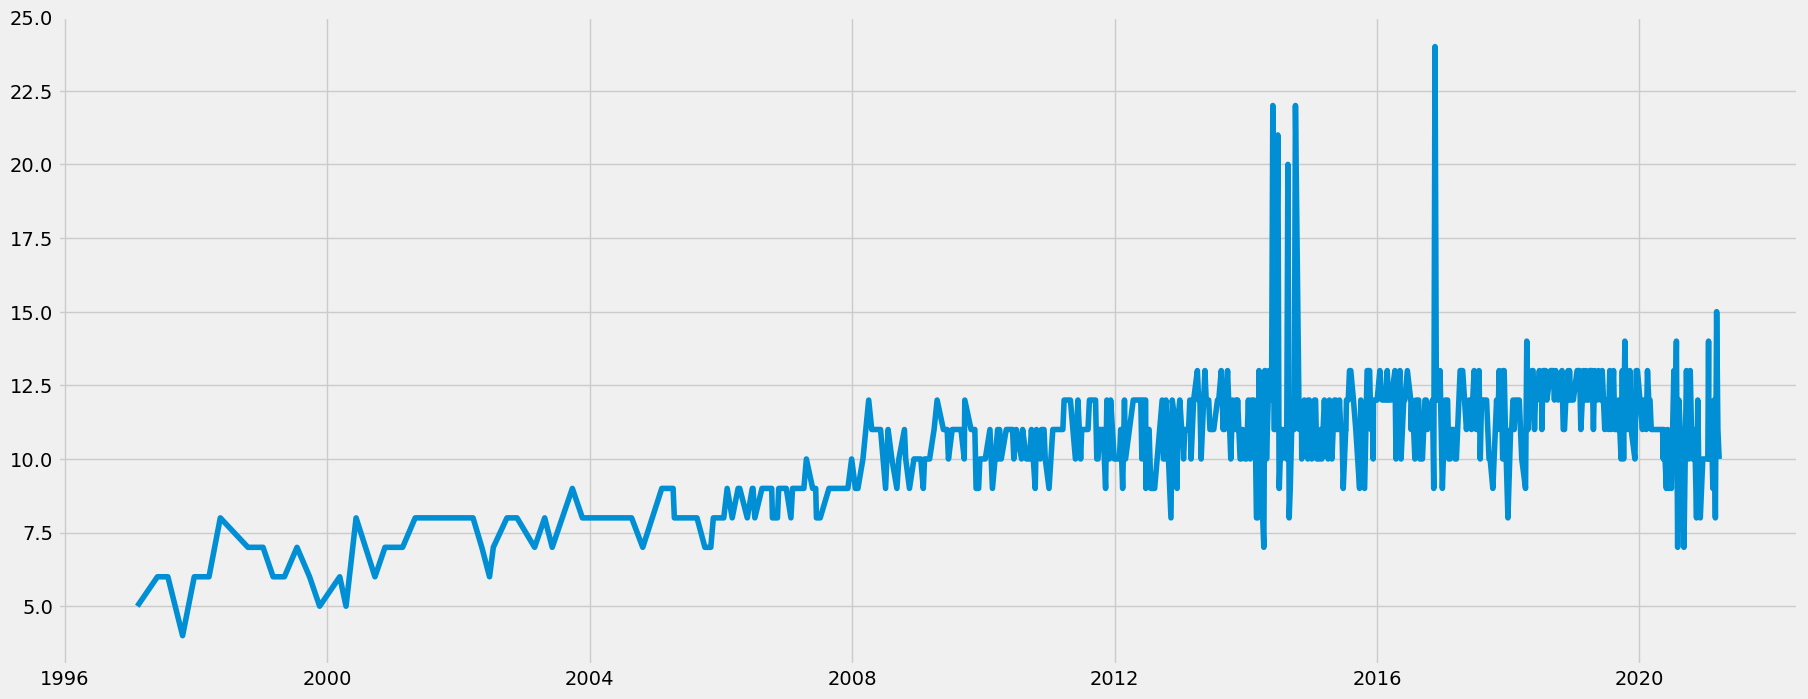

In [21]:
plt.figure(figsize=(20,8), dpi=100) 
    

plt.plot(df_UFC)

In [22]:
# Check for missing values (you shouldn't have any)

df_UFC.isnull().sum()

sum_fights    0
dtype: int64

## 05. Decompose the data’s components.
Analyze the results from the plot in a markdown cell.

In [25]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(df_UFC, model='additive', period=1)

In [26]:
from pylab import rcParams # This will define a fixed size for all special charts.\n",

rcParams['figure.figsize'] = 18, 7

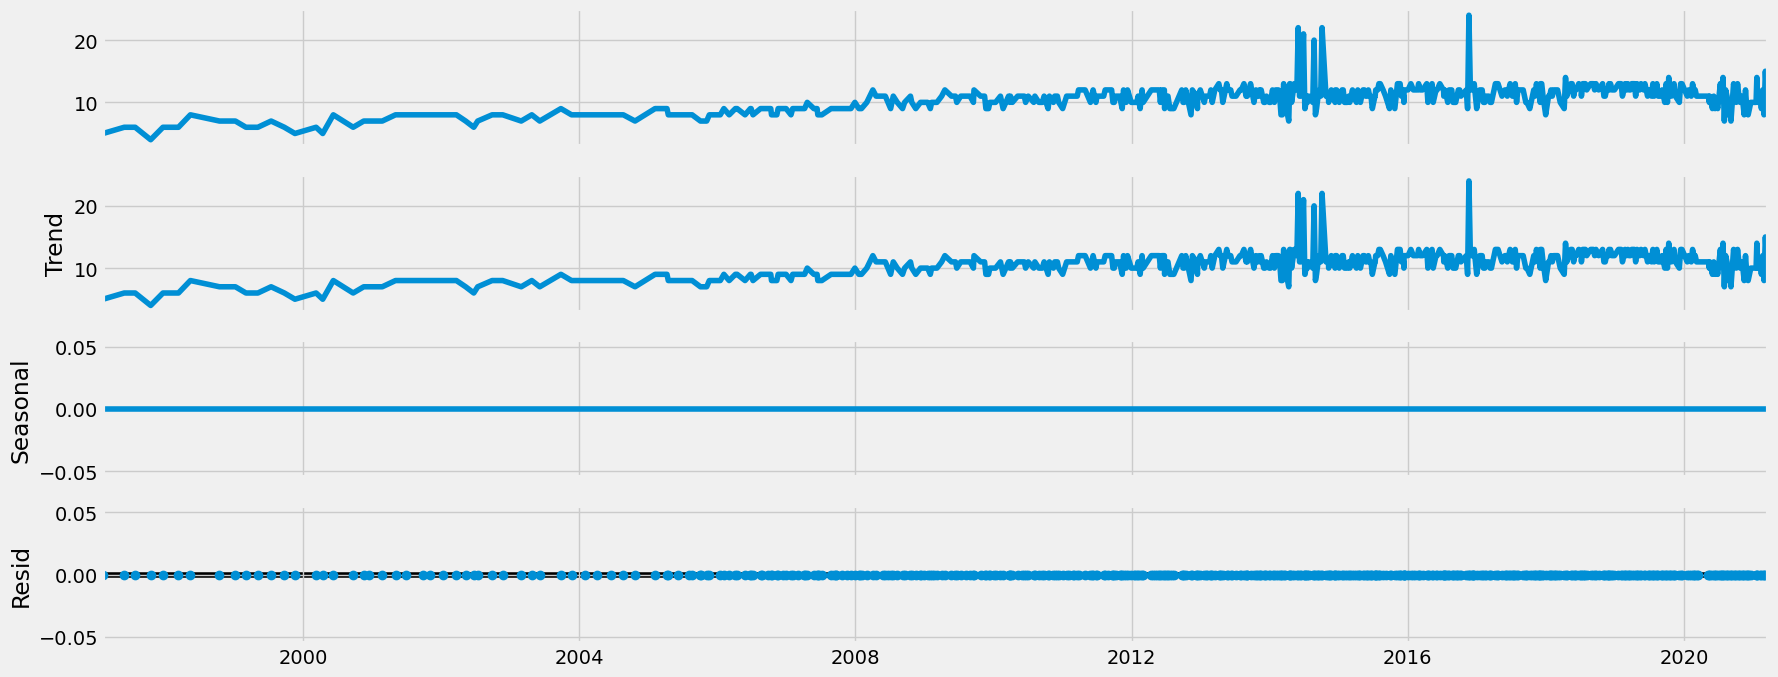

In [27]:
# Plot the separate components

decomposition.plot()
plt.show()

### From the above we can see the trend increases over time meaning more fights as the years go on and more likely the UFC becomes more known and marketed. Still unknown what the spikes are around 2014-2015 and 2017. These could be special events at certain points having a higher amount of fights. Deeper analysis can look into this. It can also be seen that there is no seasonal pattern as it is flat. 

## 06. Conduct a Dickey-Fuller test to check for stationarity.
Interpret the results in a markdown cell and reference your null hypothesis.

In [34]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_UFC['sum_fights'])

Dickey-Fuller Stationarity test:
Test Statistic                  -3.423635
p-value                          0.010179
Number of Lags Used             17.000000
Number of Observations Used    520.000000
Critical Value (1%)             -3.442988
Critical Value (5%)             -2.867114
Critical Value (10%)            -2.569739
dtype: float64


### Observations: The Dickey-Fuller test shows that this time series is stationary
The Critical Value (10%) is -2.867114, is larger than the Statistic Test of -3.423635. We can reject null hypothesis. This is stationary. The p - value of 0.010179, indicates that the test result is significant. A p-value less than or equal to a predetermined significance level (often 0.05 or 0.01) indicates a statistically significant result, meaning the observed data provide strong evidence against the null hypothesis. 

## 06. Check your data’s autocorrelations.

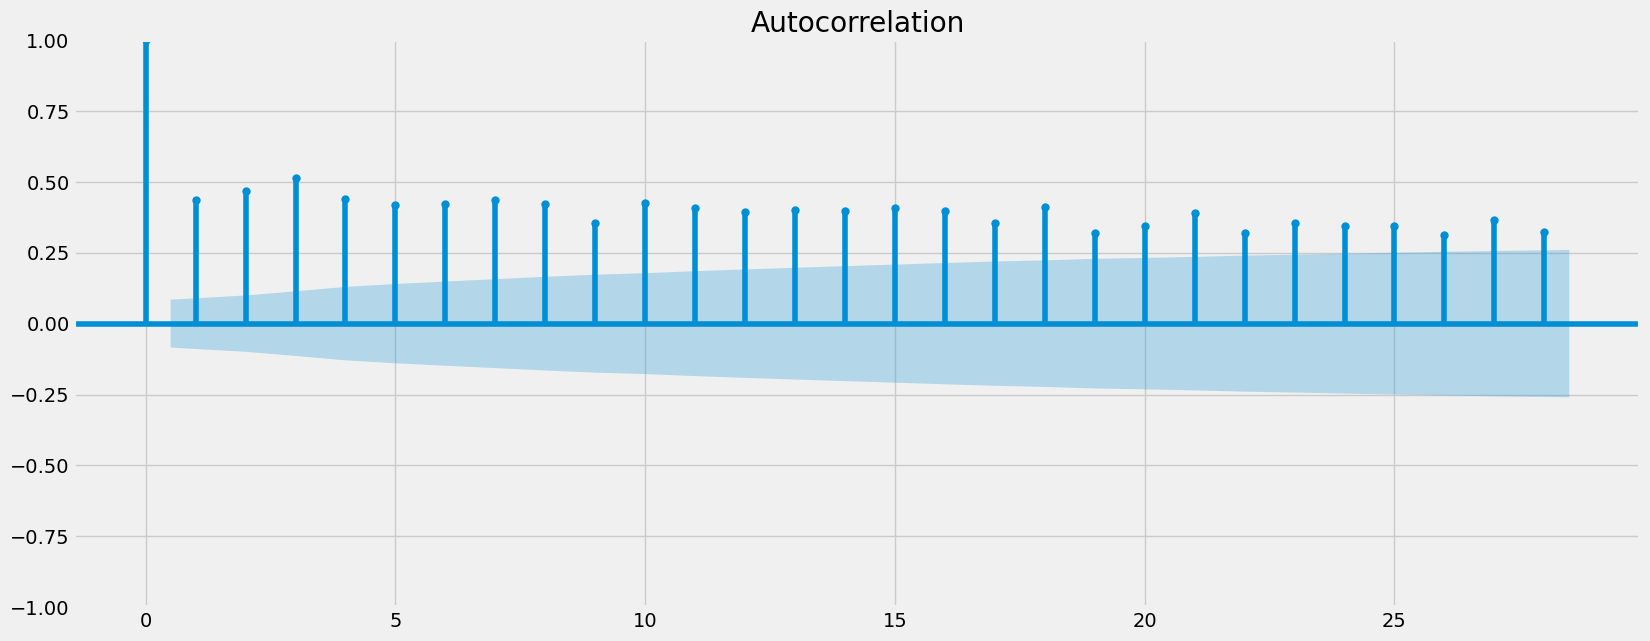

In [35]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_UFC)
plt.show()

### There are many lags above the confidence interval edge, which means there are many lags significantly correlated with each other (or there is a lot of autocorrelated data, supporting the result of the Dickey-Fuller test)

### Although my data was confirmed stationary I still want to run round of differencing to see if differences. 

In [44]:
data_diff = df_UFC - df_UFC.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [45]:
data_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [46]:
data_diff.head()

,sum_fights
datetime,
1997-05-30,1.0
1997-07-27,0.0
1997-10-17,-2.0
1997-12-21,2.0
1998-03-13,0.0


In [47]:
data_diff.columns

Index(['sum_fights'], dtype='object')

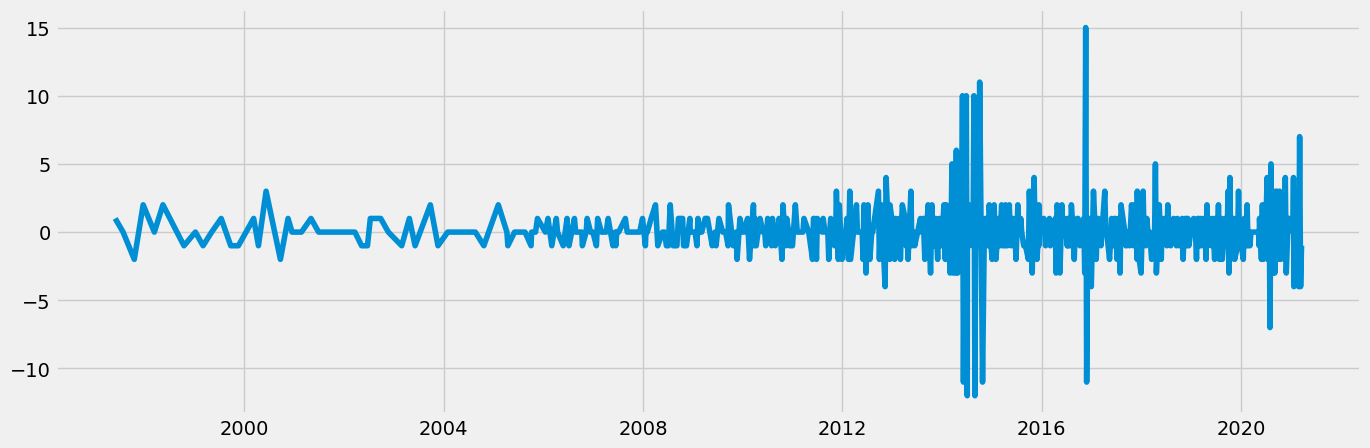

In [48]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [49]:
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -8.267725e+00
p-value                        4.886832e-13
Number of Lags Used            1.900000e+01
Number of Observations Used    5.170000e+02
Critical Value (1%)           -3.443062e+00
Critical Value (5%)           -2.867147e+00
Critical Value (10%)          -2.569756e+00
dtype: float64


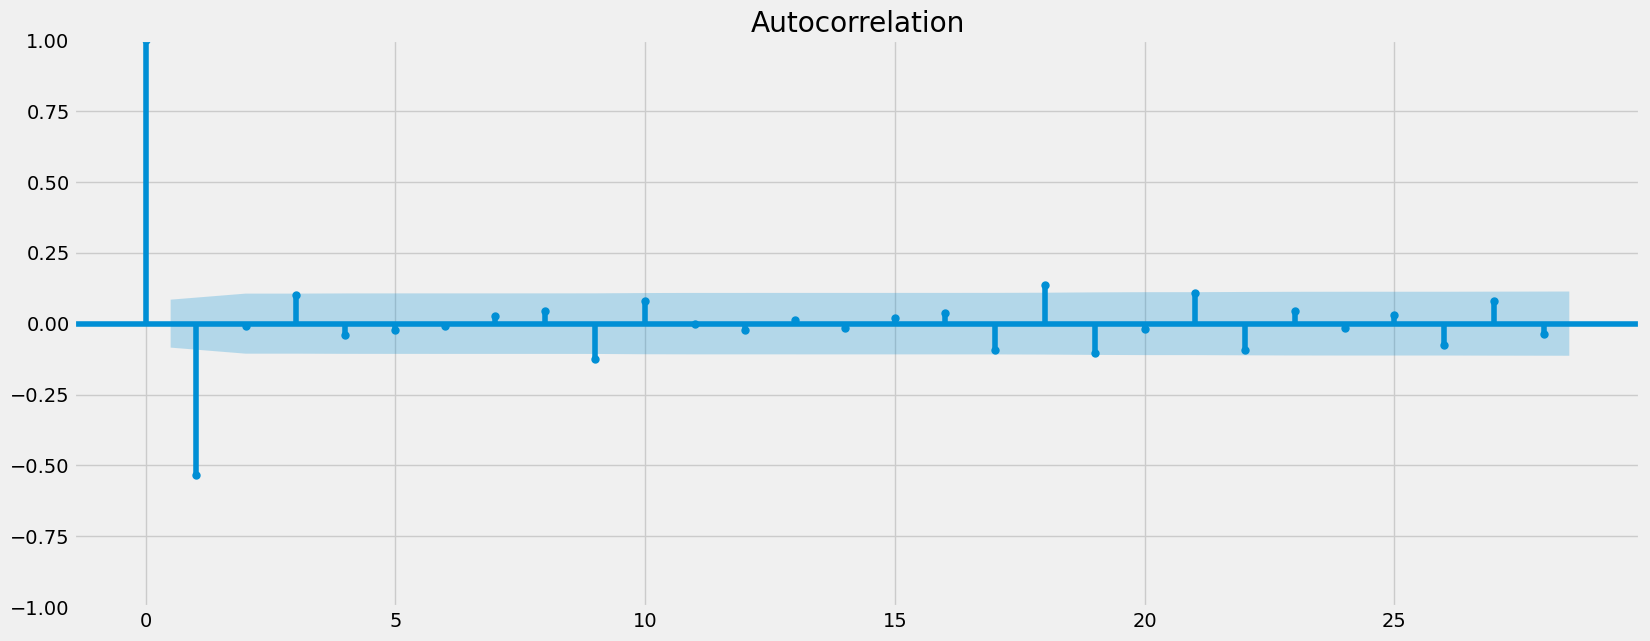

In [50]:
plot_acf(data_diff)
plt.show()

### We can see the autocorrelation plot has improved (there are fewer autocorrelated terms), it’s still not perfect. This states the Dickey-Fuller test confirming the data is stationary. I will stop here as very few lags above the blue confidence line.  